In [1]:
import re
import pandas as pd

In [2]:
# In our project, we used Python re module to remove emojis, email addresses, URLs, and hash symbol 
# so that for instance, “#LongCovid” becomes “LongCovid”.

In [3]:
emoji_pattern = re.compile("["
   u"\U0001F600-\U0001F64F" # emoticons
   u"\U0001F300-\U0001F5FF" # symbols & pictographs
   u"\U0001F680-\U0001F6FF" # transport & map symbols
   u"\U0001F1E0-\U0001F1FF" # flags (iOS)
   u"\U00002702-\U000027B0"
   u"\U000024C2-\U0001F251"
   u"\U00002500-\U00002BEF" # chinese char
   u"\U0001f921-\U0001f937"
   u"\U00010000-\U0010ffff"
   u"\u2640-\u2642"
   u"\u2600-\u2B55"
   u"\u200d"
   u"\u23cf"
   u"\u23e9"
   u"\u231a"
   u"\ufe0f" # dingbats
   u"\u3030"
   "]+", flags=re.UNICODE)
email_pattern = re.compile("\S+@\S+\.\S{2,3}")
link_pattern = re.compile("https?\S+")
account_names_pattern=re.compile("@\w+")

In [4]:
def clean_data(tweet):
    try:
        tweet_rep = emoji_pattern.sub(r'', tweet)
        tweet_rep = email_pattern.sub(r'', tweet_rep)
        tweet_rep = link_pattern.sub(r'', tweet_rep)
        tweet_rep = tweet_rep.replace("[‘’“”]", "") #remove fancy quotes, second pass
        tweet_rep = tweet_rep.replace("…"," ") #replace ellipsis with single space, second pass
        tweet_rep = tweet_rep.replace("&amp;", "&")
        tweet_rep = tweet_rep.replace("#", '')
        tweet_rep = tweet_rep.replace("-", '') #remove hyphens, found on second pass
        tweet_rep = account_names_pattern.sub(r'', tweet_rep) #replace tagged Twitter accounts & mentions/usernames (i.e, all words starting with @ symbol)
        tweet_rep = tweet_rep.strip()
        return tweet_rep
    except:
        return ""



In [5]:
'''#Reading in data from July 2021 to 2022 for the first time & saving to single csv file
import os
import glob

# setting the path for joining multiple files
files = os.path.join("C:\\Users\\Abhinaya\\twint_scraped_data_non_zip\\", "*_Scraped_LongCovid.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# Joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

#Saving final csv file
pd.concat(map(pd.read_csv, files), ignore_index=True).to_csv('twint_scraped_data_non_zip/final_tweets.csv', sep=',')'''

#Create dataframe
df=pd.read_csv('twint_scraped_data_non_zip/final_tweets.csv')
df['tweet']

0        Long Covid, sintomi e causa: nuovo studio su p...
1        @Azarias_Ananias grazie ❤️ Speriamo di tornare...
2        @Davide19663174 @gloquenzi Sono commenti come ...
3        Long Covid sintomi e causa: nuovo studio su po...
4        Long Covid, sintomi e causa: nuovo studio su p...
                               ...                        
25147    @GandalfGrigioOf @gred_vet @Geronimissimooo @L...
25148    @AdrianaSpappa Il Long Covid è uno strascico, ...
25149    @AdrianaSpappa Long COVID sembra più un proble...
25150    Materie prime, manca anche il vetro: è l’effet...
25151    @RobiVil La mancanza di concentrazione e quei ...
Name: tweet, Length: 25152, dtype: object

In [6]:
clean_tweet_list=[]
for tweet in df.tweet:
    #print(i)
    clean_tweet=clean_data(tweet)
    clean_tweet_list.append(clean_tweet)
print(clean_tweet_list)

['Long Covid, sintomi e causa: nuovo studio su\xa0polmoni', 'grazie  Speriamo di tornare allo stato Long Covid in guarigione in cui ero prima.... credo una o più reinfezioni non mi abbiano giovato', 'Sono commenti come quelli di cui sopra che fanno rabbrividire e che indicano che siamo perduti. Le misure cinesi hanno salvato molte vite e risparmiato casi di LongCovid. Stiamo qui con 400 morti al giorno a fare gli splendidi....', 'Long Covid sintomi e causa: nuovo studio su polmoni   Covid sintomi causa: nuovo studio', 'Long Covid, sintomi e causa: nuovo studio su polmoni', 'Long Covid, sintomi e causa: nuovo studio su\xa0polmoni', 'Long Covid, sintomi e causa: nuovo studio su polmoni: (Adnkronos)  Indicazioni sulle conseguenze provocate dalla malattia', "Domanda secca! Ma se non conosciamo ancora gli effetti del Long Covid, conosciamo già gli effetti de Long Vaccino? E' paragonabile il rischio/beneficio? Mah ... non ci fate capire mai niente!", 'staseraitalia  il prof BROCCOLI conferma

In [7]:
#!python -m pip install h5py
#!python -m pip install wrapt

In [8]:
#!python -m pip install typing_extensions

In [9]:
import re
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [10]:
#Installations needed on my PC because of previous spaCy instance, not needed for project
#!python -m pip install -U spacy --user
#!python -m spacy validate
#!python -m spacy download en_core_web_lg
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md

In [11]:
# spacy for lemmatization
import spacy

In [12]:
# Initialize spacy 'it_core_news_sm' model, keeping only tagger component (for efficiency)
#!python -m spacy download it_core_news_sm
nlp = spacy.load('it_core_news_sm', disable=['parser', 'ner'])

In [13]:
#Need to install scikit-learn
#!python -m pip install scikit-learn==1.0.1
#!python -m pip install scikit-learn --upgrade

In [14]:
# Plotting tools
#!python -m pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [15]:
#Read in master list of stopwords combining spacy, nltk and a modified version of stopword-iso, created in #task7
with open("stopwords-it_final.txt", "r", encoding="utf-8") as file:
        stop_word_list=list(file.read())
#Removing majority occurrences of long covid or covid to reduce overlap among topics, second pass
stop_word_list.extend(['longcovid','long','covid','long\ covid','long_covid'])
#Above approach led to insignificant words being included among topics, so this may not be necessary. Check after nouns-only analysis
#print(stop_word_list)

In [16]:
'''The next step is to divide the text into words (tokenization), which is required for further processing. 
There are a few tools to do this; we used gensim simple_preprocess:'''
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

data_as_sentences = list(sent_to_words(clean_tweet_list))
#Print first sentence
print(data_as_sentences[0])

['long', 'covid', 'sintomi', 'causa', 'nuovo', 'studio', 'su', 'polmoni']


In [17]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_as_sentences, min_count=3, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_as_sentences], threshold=10)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)# See trigram example

#print for first sentence
print(trigram_mod[bigram_mod[data_as_sentences[0]]])

['long_covid', 'sintomi_causa_nuovo', 'studio', 'su', 'polmoni']


In [18]:
'''
Next, we define a few functions that will be used to process our data before it is passed to an LDA model: 
remove stopwords, get bigrams and trigrams, 
lemmatize (i.e. obtain the base form of words: e.g. “services” -> “service”, “worked” -> “work”, etc.):
'''

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word.lower() not in stop_word_list] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
#def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
def lemmatization(texts, allowed_postags=['NOUN']): #third pass, removing verbs and only retaining nouns
    #https://spacy.io/api/annotation
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [19]:
# Remove Stop Words
data_as_sentences_nostops = remove_stopwords(data_as_sentences)
# Form Bigrams
data_as_sentences_bigrams = make_bigrams(data_as_sentences_nostops)
# Perform lemmatization keeping only parts of speech that are nouns, adjectives, verbs, or adverbs
data_lemmatized = lemmatization(data_as_sentences_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[0])

['sintomo', 'causa_nuovo', 'studio', 'polmone']


In [20]:
'''
Topic modeling does not accept words as input, the text needs to be converted into a numerical form. 
To do this, we first create a data dictionary that maps a word to its integer ID:
'''
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Next, we apply the doc2bow function to convert the texts into the bag-of-words (BoW) format, 
# Which is a list of (token_id, token_count) tuples.

# Create a corpus from the lemmatized text we want to analyse
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View for first sentence
print(corpus[0])

'''The produced corpus shown above is a mapping of (word_id, word_frequency). 
For example, (0, 1) above implies, word id 0 occurs once in the first document. 
Likewise, in (1, 2) word id 1 occurs twice, and so on. 
This is used as the input by the LDA model.'''

[(0, 1), (1, 1), (2, 1), (3, 1)]


'The produced corpus shown above is a mapping of (word_id, word_frequency). \nFor example, (0, 1) above implies, word id 0 occurs once in the first document. \nLikewise, in (1, 2) word id 1 occurs twice, and so on. \nThis is used as the input by the LDA model.'

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary

In [21]:
id2word[0]

'causa_nuovo'

To see a human-readable form of the corpus itself:

In [22]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('causa_nuovo', 1), ('polmone', 1), ('sintomo', 1), ('studio', 1)]]

## Build LDA model


In [23]:
# Build basic LDA model using gensim LDA
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
            id2word=id2word,
            num_topics=5, #will experiment with multiple values here
            random_state=100,
            update_every=1,
            chunksize=50,
            passes=10,
            alpha='auto',
            per_word_topics=True)
#The topics are provided in the form of a list with the weights and words associated with each topic
#The weights are in descending order, i.e., the first word has most prevalence in the topic, the second word has next-highest prevalence in the topic, and so on
pprint(lda_model.print_topics())

#Store topics with their keywords and corresponding weights
topics_and_keywords=lda_model.print_topics()


# **Notes**

# 1. **Alpha, Eta parameters**. alpha and eta can be thought of as smoothing parameters when we compute how much each document "likes" a topic (in the case of alpha) 
# or how much each topic "likes" a word (in the case of gamma). A higher alpha makes the document preferences "smoother" over topics, 
# and a higher eta makes the topic preferences "smoother" over words. Start with "auto", and if the topics are not relevant, try other values. 
# I recommend using low values of Alpha and Eta to have a small number of topics in each document and a small number of relevant words in each topic.
# 2. **Increase** the number of passes to have a better model. 3 or 4 is a good number, but you can go higher.


[(0,
  '0.054*"rischio" + 0.044*"parlare" + 0.027*"primo" + 0.025*"grave" + '
  '0.024*"quasi" + 0.022*"comunque" + 0.021*"cercare" + 0.019*"molto" + '
  '0.019*"rischiare" + 0.016*"invece"'),
 (1,
  '0.032*"virus" + 0.022*"purtroppo" + 0.021*"morto" + 0.019*"malattia" + '
  '0.018*"no" + 0.014*"cervello" + 0.012*"concentrazione" + 0.011*"attaccare" '
  '+ 0.011*"paziente" + 0.011*"conseguenza"'),
 (2,
  '0.027*"perco" + 0.027*"anno" + 0.024*"esistere" + 0.023*"effetto" + '
  '0.023*"morire" + 0.013*"meno" + 0.013*"danno" + 0.012*"dato" + '
  '0.012*"andare" + 0.011*"prendere"'),
 (3,
  '0.065*"anche" + 0.045*"non" + 0.039*"bambino" + 0.031*"piu" + 0.027*"solo" '
  '+ 0.022*"dire" + 0.020*"vaccinare" + 0.018*"ora" + 0.017*"sintomo" + '
  '0.016*"sapere"'),
 (4,
  '0.114*"non" + 0.039*"avere" + 0.037*"fare" + 0.030*"vaccino" + 0.014*"poi" '
  '+ 0.013*"problema" + 0.012*"ancora" + 0.011*"mese" + 0.011*"caso" + '
  '0.009*"bastare"')]


In [24]:
#Installing google translate API so that English translations of specific words can be used for interim evaluation # of whether the topics are sensible
#!pip install googletrans
#This API was leading to unnecessary AttributeError, so trying another API google_trans_new
#!pip install google_trans_new

In [25]:
#!pip install google_trans_new
from pprint import pprint #for printing topic list neatly
from google_trans_new import google_translator  
translator = google_translator()  
#translate_text = translator.translate('Long Covid, sintomi e causa: nuovo studio su polmoni ',lang_tgt='en')  
translate_text = translator.translate(topics_and_keywords,lang_src='it',lang_tgt='en') 
pprint(translate_text)



('[(0, \'0.054*"Risk" + 0.044*"speak" + 0.027*"first" + 0.025*"serious" + '
 '0.024*"almost" + 0.022*"anyway" + 0.021*"Search" + 0.019*" Very " + 0.019*" '
 'risk " + 0.016*" instead "\'), (1,\' 0.032*" Virus " + 0.022*" Unfortunately '
 '" + 0.021*" dead " + 0.019*" disease " + 0.018*" No " + 0.014*"brain" + '
 '0.012*"concentration" + 0.011*"attack" + 0.011*"patient" + '
 '0.011*"consequence"), (2, \'0.027*"path" + 0.027*"year" + 0.024 *"exist" + '
 '0.023*"Effect" + 0.023*"Die" + 0.013*"less" + 0.013*"Damage" + 0.012*"Data" '
 '+ 0.012*"Go" + 0.011*"take"), ( 3, \'0.065*"also" + 0.045*"not" + '
 '0.039*"Child" + 0.031*"More" + 0.027*"only" + 0.022*"say" + '
 '0.020*"Vaccinare" + 0.018*"Now" + 0.017*"Symptom" + 0.016*"Knowing" \'), '
 '(4,\' 0.114*"not" + 0.039*"Having" + 0.037*"Make" + 0.030*"Vaccino" + '
 '0.014*"Then" + 0.013 *"problem" + 0.012*"still" + 0.011*"month" + '
 '0.011*"case" + 0.009*"Basta" \')] ')


## LDA Model evaluation

### **Perplexity**

A traditional metric for evaluating topic models is the ‘held out likelihood’. This is also referred to as ‘perplexity’. Perplexity is calculated by splitting a dataset into two parts—a training set and a test set. The idea is to train a topic model using the training set and then test the model on a test set that contains previously unseen documents (ie. held out documents). Likelihood is usually calculated as a logarithm, so this metric is sometimes referred to as the ‘held out log-likelihood’.

Perplexity metric assesses a topic model’s ability to predict a test set after having been trained on a training set. It captures how surprised a model is of new data it has not seen before, and is measured as the normalized log-likelihood of a held-out test set. In practice, around 80% of a corpus may be set aside as a training set with the remaining 20% being a test set.

In [26]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -9.17941099055963


### **Topic coherence**

Although the perplexity metric is a natural choice for topic models from a technical standpoint, it does not provide good results for human interpretation. This limitation of perplexity measure served as a motivation for more work trying to model the human judgment, and thus Topic Coherence.

Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

*Coherence Measures*

Let’s take quick look at different coherence measures, and how they are calculated:

1. C_v measure is based on a sliding window, one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
2. C_p is based on a sliding window, one-preceding segmentation of the top words and the confirmation measure of Fitelson’s coherence
3. C_uci measure is based on a sliding window and the pointwise mutual information (PMI) of all word pairs of the given top words
4. C_umass is based on document cooccurrence counts, a one-preceding segmentation and a logarithmic conditional probability as confirmation measure
5. C_npmi is an enhanced version of the C_uci coherence using the normalized pointwise mutual information (NPMI)
6. C_a is baseed on a context window, a pairwise comparison of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosine similarity
7. u_mass UMass scores higher when words appear together more frequently than they do by themselves, operating under the assumption that topics that are "coherent" will feature words that appear together more often.

In [27]:
# Compute Coherence Score using 'c_v' measure
coherence_model_lda_cv = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_value_lda_cv = coherence_model_lda_cv.get_coherence()
print('\nC_v Coherence Score: ', coherence_value_lda_cv)
# Compute Coherence Score using 'UMass' measure
coherence_model_lda_umass = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_value_lda_umass = coherence_model_lda_umass.get_coherence()
print('\nUMass Coherence Score: ', coherence_value_lda_umass)


C_v Coherence Score:  0.271102324197651

UMass Coherence Score:  -4.811620871877506


In [28]:
def compute_coherence_values(dictionary, corpus, texts, random_state,update_every,chunksize, passes, alpha, per_word_topics, limit, start=2, step=4):
    """
    Compute c_v coherence for various number of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("Number of topics: ",num_topics)
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
        random_state=random_state,
        update_every=update_every,
        chunksize=chunksize,
        passes=passes,
        alpha=alpha,
        per_word_topics=per_word_topics
        )
        model_list.append(model)
        #Using c_v for calculating coherence
        #coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') #too many overlapping topics and some keyword repetition despite elbow num_topics optimization
        #Using U_Mass for calculating coherence
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        print("Coherence value: ",coherencemodel.get_coherence())
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [29]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus,texts=data_lemmatized, 
            random_state=100,
            update_every=1,
            chunksize=50,
            passes=10,
            alpha='auto',
            per_word_topics=True,
            limit=20,
            start=2, 
            step=4)


Number of topics:  2
Coherence value:  -3.1400018265823606
Number of topics:  6
Coherence value:  -5.523147402732451
Number of topics:  10
Coherence value:  -7.226210021425009
Number of topics:  14
Coherence value:  -9.50034070653258
Number of topics:  18
Coherence value:  -6.796851451749469


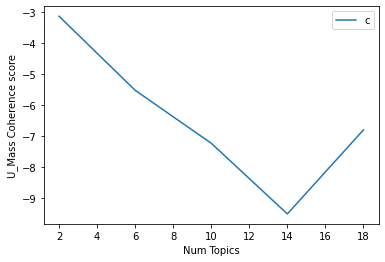

In [30]:
# Show graph
import matplotlib.pyplot as plt
limit=20; start=2; step=4;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
#plt.ylabel("c_v Coherence score")
plt.ylabel("U_Mass Coherence score")
plt.legend("coherence_values", loc='best')
plt.show()

# LDA topic visualization

In [31]:
#Creating Topic Distance Visualization 
#Using num_topics=10 and 14 based on c_v coherence graph elbow value, and num_topics=14 based on u_mass coherence value
#Recreate topic model with num_topics value
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this

fin_lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=14,
random_state=100,
update_every=1,
chunksize=50,
passes=10,
alpha='auto',
per_word_topics=True
)

%matplotlib inline
pyLDAvis.enable_notebook()
viz= pyLDAvis.gensim_models.prepare(fin_lda_model,corpus=corpus,dictionary=id2word)
pyLDAvis.display(viz)
pyLDAvis.save_html(viz, 'lda_visualization_7.html')

c:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [36]:
#Print the topics as per the topic model with the word mix and weightage
topics_and_keywords=fin_lda_model.print_topics()
pprint(topics_and_keywords)
#To also print coherence score of each topic along with the topic
top_topics_and_keywords=fin_lda_model.top_topics(corpus=corpus, topn=10, coherence='u_mass')
pprint(top_topics_and_keywords)

[(0,
  '0.143*"causa" + 0.055*"lavoro" + 0.053*"cosiddetto" + 0.044*"gennaio" + '
  '0.039*"pediatra" + 0.025*"prossimo" + 0.000*"racconto" + '
  '0.000*"sapori_odore" + 0.000*"evitato" + 0.000*"dicembre"'),
 (1,
  '0.365*"avere" + 0.099*"purtroppo" + 0.048*"paziente" + 0.046*"medico" + '
  '0.035*"pero" + 0.034*"passare" + 0.034*"meglio" + 0.026*"idea" + '
  '0.018*"punto" + 0.018*"studiare"'),
 (2,
  '0.272*"vaccino" + 0.102*"morire" + 0.061*"cercare" + 0.040*"novax" + '
  '0.037*"giorno" + 0.029*"continuare" + 0.026*"italiano" + 0.025*"sembrare" + '
  '0.024*"termine" + 0.022*"davvero"'),
 (3,
  '0.195*"bambino" + 0.109*"dire" + 0.100*"vaccinare" + 0.057*"persona" + '
  '0.056*"primo" + 0.038*"giovane" + 0.026*"omicron" + 0.020*"sarscov" + '
  '0.020*"soprattutto" + 0.016*"servire"'),
 (4,
  '0.266*"caso" + 0.084*"forse" + 0.054*"post" + 0.047*"leggere" + '
  '0.028*"aumento" + 0.024*"mantovano" + 0.004*"pubblicato_su" + '
  '0.000*"con_omicron" + 0.000*"inesistente" + 0.000*"materi

In [33]:

translate_text = translator.translate(top_topics_and_keywords,lang_tgt='en') 
neat_list=translate_text.split('+')
pprint(neat_list)

["[([(0.18593512, 'not'), (0.063070506, 'also'), (0.025730867, 'only'), "
 "(0.017353056, 'hour'), \u200b\u200b(0.01680201, 'path'), (0.016728435, "
 "'year') , (0.015847351, 'Knowing'), (0.014279522, 'month'), (0.011791506, "
 "'Basta'), (0.0110023795, 'See')], -3.0563777634596185), ([(0.19495955, "
 "'child'), (0.10858768 , 'say'), (0.10026432, 'Vaccinare'), (0.056682028, "
 "'Person'), (0.055630077, 'First'), (0.038107425, 'Young'), (0.025978483, "
 "'Muricron'), (0.02031945, ' Sarscov ') (0.020055065,' Above all '), "
 "(0.015772667,' Serve ')], -3.80133815237873), ([(0.19843847,' to do '), "
 "(0.07788302,' then '), (0.06303006,' existence ') , (0.0612722, 'Effect'), "
 "(0.055087492, 'dead'), (0.04569362, 'what'), (0.034880504, 'Damage'), "
 "(0.03270791, 'News'), (0.030382134, 'Prima'), ( 0.025975907, 'Stay')], "
 "-4.097038901410194), ([(0.21468423, 'More'), (0.055968378, 'very'), "
 "(0.05550095, 'Data'), (0.03885892, 'Certain'), (0.038575806, ' un_anno '), "
 "(0.03779311,' K

**How to infer pyLDAvis output?**

- Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.
- A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.
- A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.
- if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

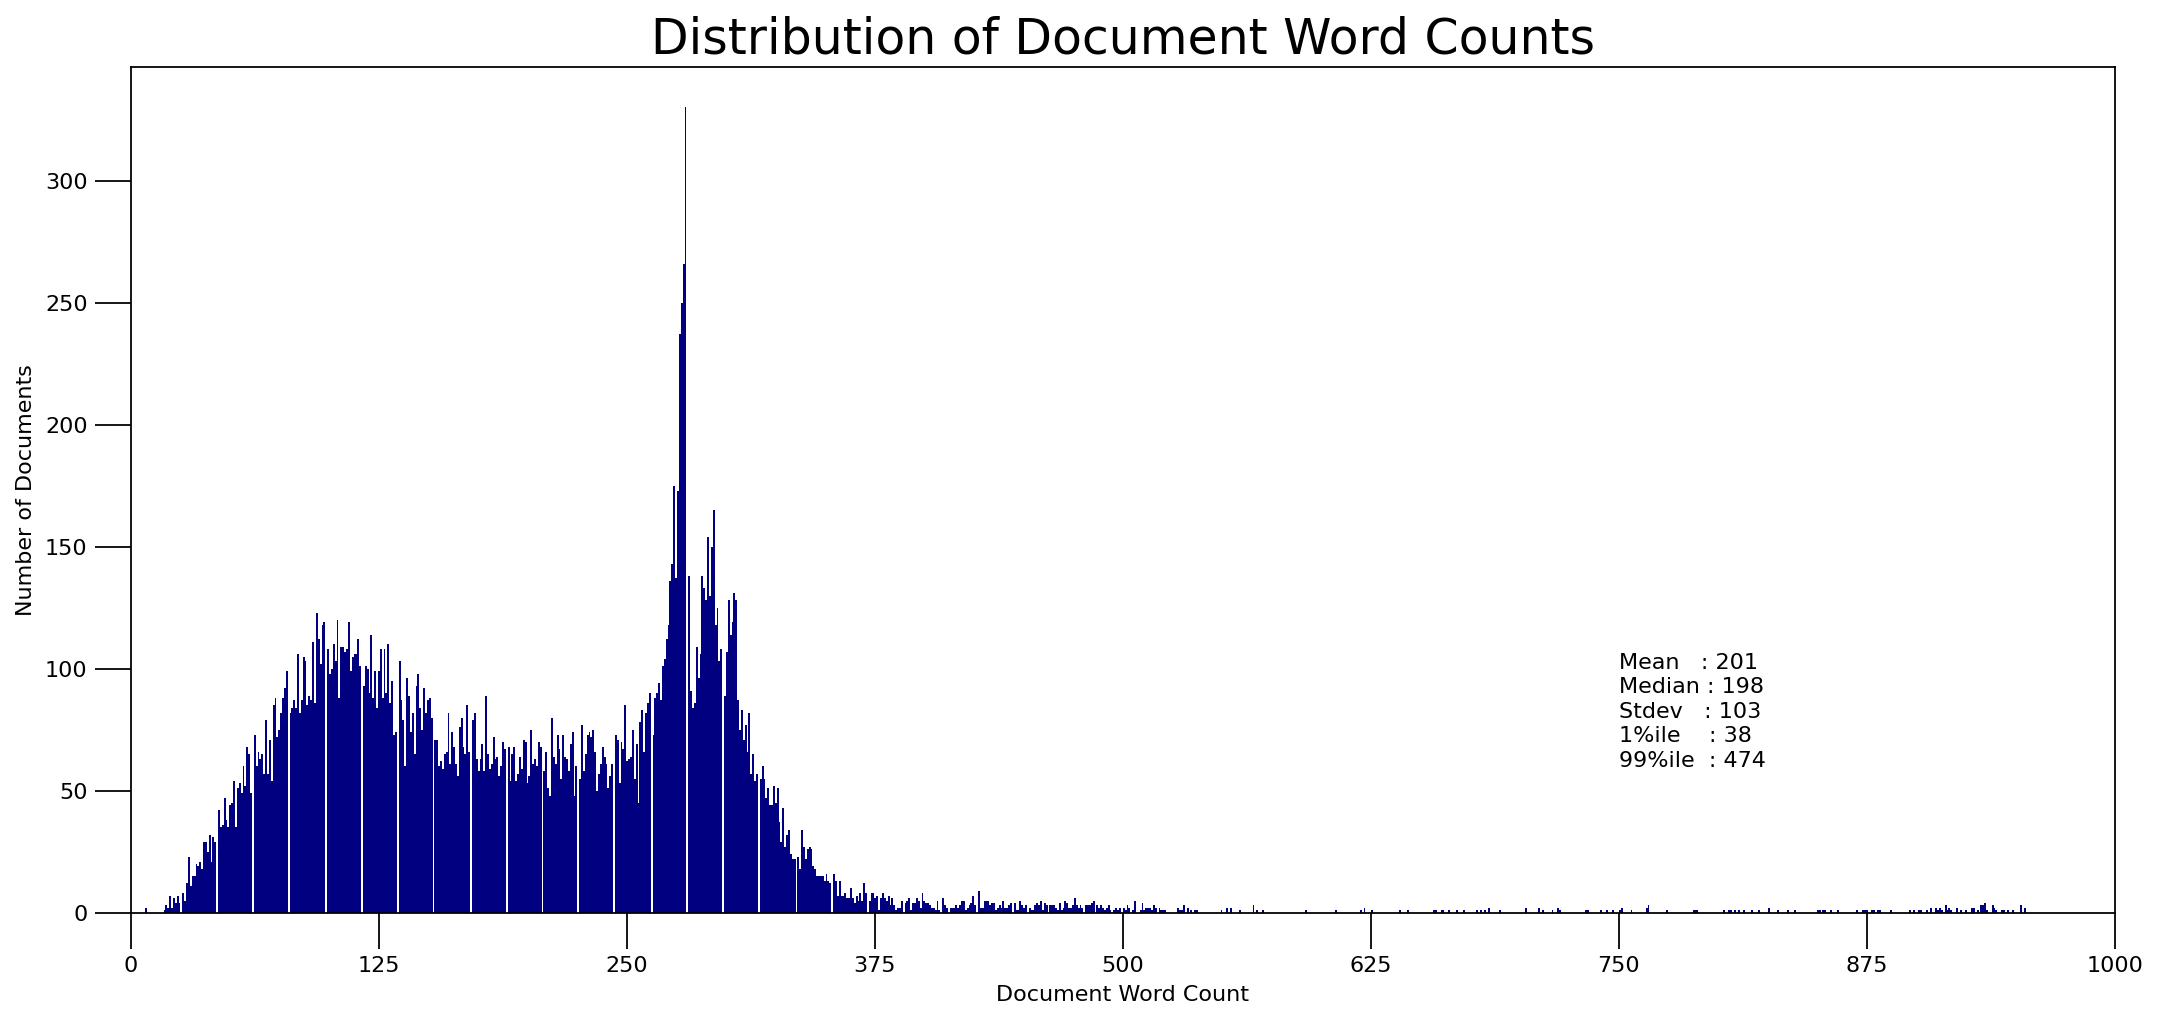

In [35]:
import numpy as np
doc_lens = [len(d) for d in df.tweet]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()